# TSLA price prediction

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
#### Use the Ticker symbol "TSLA" to access 3 year daily data starting from '2015-07-10' to '2020-07-09') from YAHOO FINANCE.

df = yf.download("TSLA", start="2015-07-10", end="2020-07-09")
df




In [3]:
print(df['Close'].autocorr(lag=3))

0.9840969618756936


In [4]:
#### Splitting train/test
ts = df['Close']
l = len(ts)
cut_off = int(l*0.7)
ts_train = ts[:cut_off]
ts_test = ts[cut_off:]

In [7]:
history = ts_train.tolist()
model_prediction = []

for value in ts_test[:]:
    ARIMA_model = ARIMA(history, order=(4,1,0))
    ARIMA_res = ARIMA_model.fit()
    pred = ARIMA_res.predict(len(history)+1)[0]
    model_prediction.append(pred)
    history.append(value)

[67.26914919891212,
 67.13730473569666,
 67.48603503813567,
 68.88868465025573,
 69.47321367764378,
 66.86928993334747,
 68.73118494074414,
 69.30896702623146,
 69.50571732508115,
 60.538091677432135,
 59.585622610141144,
 57.680889203392844,
 58.459706626483836,
 59.502877945162396,
 59.34210989053214,
 59.43719011662632,
 61.726560466560606,
 61.46205488803025,
 62.36627270587393,
 62.556529720150884,
 64.25377170409539,
 63.46422768703272,
 61.441863627548805,
 61.09021371129798,
 62.62115312021315,
 62.45132423802703,
 61.60727799104529,
 60.71391548047083,
 61.57338295867494,
 61.18651320172361,
 60.50556789491956,
 58.23474285569636,
 58.91100479231708,
 59.83022862393461,
 59.622906758778264,
 62.88929085241529,
 64.03837706217723,
 58.957028952312434,
 56.90656920265664,
 55.41734380135892,
 55.419234884176795,
 55.42489454946503,
 56.874866665727794,
 58.20119332704524,
 56.64531683572768,
 57.67077334231938,
 58.019327673218974,
 55.11972038218929,
 53.819708859681086,
 53.56

In [ ]:
model_prediction_series = pd.Series(model_prediction, index=ts_test.index)

print(model_prediction_series.head())
print(ts_test.head())

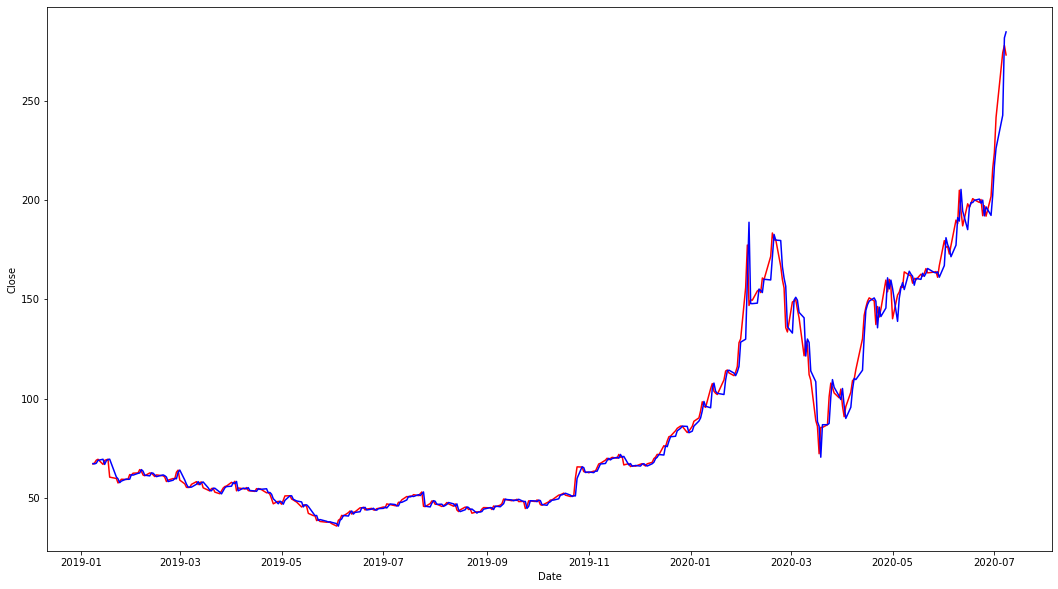

In [12]:
plt.subplots(figsize=(18,10))

ax = sns.lineplot(data=ts_test, color='r')
ax = sns.lineplot(data=model_prediction_series, color='b')

plt.show()

